# Geometrical Methods in Machine Learning
## Homework 1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA, FastICA

### Task 1: PCA, interpretation (2 points)

Consider Ozone Level dataset, https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection.

Apply PCA analysis to data to find PCA estimate of data dimensionality given by the number of variables explaining 80% and 95% of the variance.

Draw and interpret biplots of the first two principal components and top 5 features with the highest influence (largest absolute eigenvalue coefficient) to each first two principal components. Can you interpret the each of first two principal components in terms of original variables? Are there any meaningful groupings in the original variables?

Comment whether PCA is applicable to categorical variables, as well as your preprocessing strategy for them.

In [ ]:
X, y = fetch_openml("ozone_level", return_X_y=True)
X

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



WSR0 WSR1 WSR2 WSR3 WSR4 WSR5 WSR6 WSR7 WSR8 WSR9  ...    T50  RH50  \
0     0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  2.3  ...  -15.5  0.15   
1     2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  3.4  ...  -14.5  0.48   
2     2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  2.5  ...  -15.9   0.6   
3     4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  3.1  ...  -16.8  0.49   
4     2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  1.4  ...      ?     ?   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   ...   
2531  0.3  0.4  0.5  0.5  0.2  0.3  0.4  0.4  1.3  2.2  ...  -12.4  0.07   
2532    1  1.4  1.1  1.7  1.5  1.7  1.8  1.5  2.1  2.4  ...    -12  0.04   
2533  0.8  0.8  1.2  0.9  0.4  0.6  0.8  1.1  1.5  1.5  ...  -11.8  0.06   
2534  1.3  0.9  1.5  1.2  1.6  1.8  1.1    1  1.9    2  ...  -10.8  0.25   
2535  1.5  1.3  1.8  1.4  1.2  1.7  1.6  1.4  1.6    3  ...  -11.9  0.54   

        U50    V50  HT50     KI     TT    SLP SLP_ Precp  
0     10.67  -1.56  5795  -12.1   17.9  10330  -55     0  
1      8.39   3.84  5805  14.05     29  10275  -55     0  
2      6.94    9.8  5790   17.9   41.3  10235  -40     0  
3      8.73  10.54  5775  31.15   51.7  10195  -40  2.08  
4         ?      ?     ?      ?      ?      ?    ?  0.58  
...     ...    ...   ...    ...    ...    ...  ...   ...  
2531   7.93  -4.41  5800  -25.6   21.8  10295   65     0  
2532   5.95  -1.14  5845  -19.4   19.1  10310   15     0  
2533    7.8  -0.64  5845   -9.6   35.2  10275  -35     0  
2534   7.72  -0.89  5845  -19.6   34.2  10245  -30  0.05  
2535  13.07   9.15  5820   1.95  39.35  10220  -25     0  

[2536 rows x 72 columns]

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce').dropna()

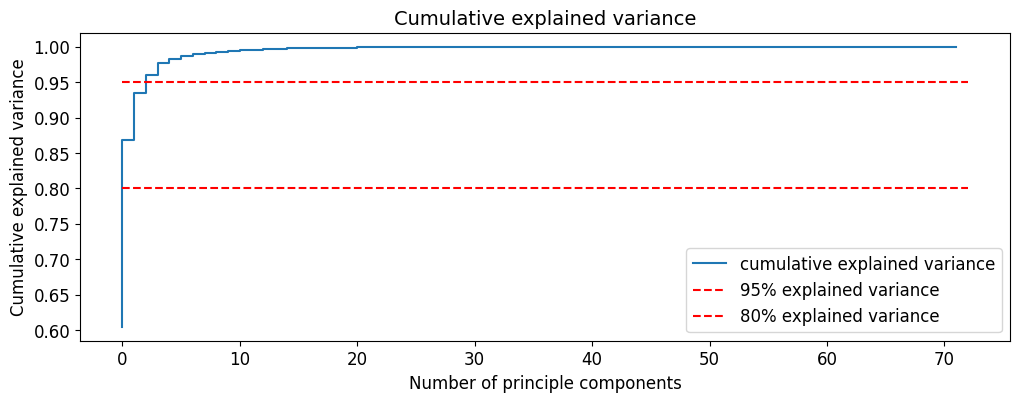

In [ ]:
# your code here

pca = PCA().fit(X)

plt.figure(figsize=(12, 4))
plt.step(
    range(len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance'
)
plt.hlines(
    y=0.95, xmin=0, xmax=len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance'
)
plt.hlines(
    y=0.8, xmin=0, xmax=len(pca.components_), colors='r', linestyles='dashed', label='80% explained variance'
)
plt.title('Cumulative explained variance', fontsize=14)
plt.xlabel('Number of principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Now a bit closer look using code from Seminar 1:

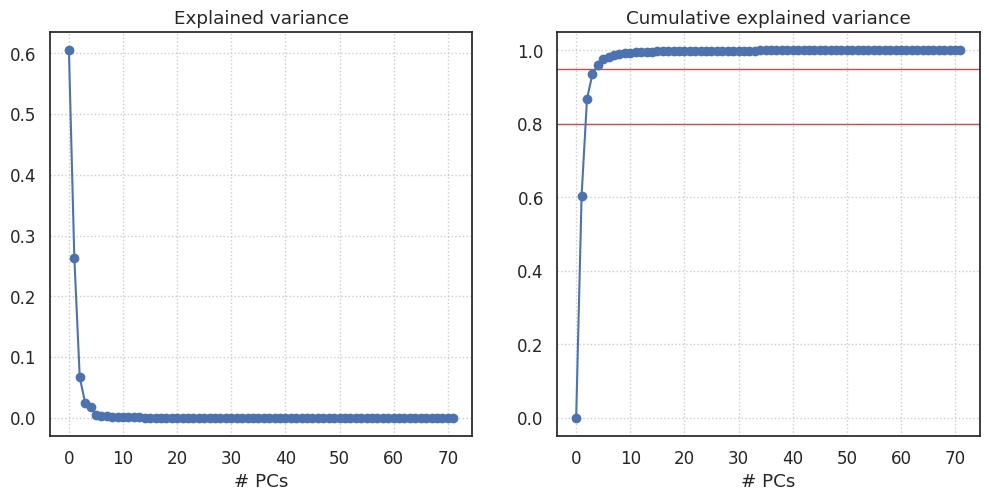

In [ ]:
pca = PCA().fit(X)
components = pca.components_

def EV_i(i, eigenvalues):
    return eigenvalues[i] / np.sum(eigenvalues)

def CEV_d(d, eigenvalues):
    eigenvalues_d_sum = 0
    for i in range(d):
        eigenvalues_d_sum += eigenvalues[i]
    return eigenvalues_d_sum / np.sum(eigenvalues)

EV = []
CEV = []

for i in range(X.shape[1]):
    EV.append(EV_i(i, pca.explained_variance_))
    CEV.append(CEV_d(i, pca.explained_variance_))

# plot EV/CEVs
fig = plt.figure(figsize=(12,5.25))

plt.subplot(121)
plt.title("Explained variance")
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(EV, "o-")

plt.subplot(122)
plt.title("Cumulative explained variance")
plt.axhline(linewidth=1, y=0.95, color='r')
plt.axhline(linewidth=1, y=0.8, color='r')
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(CEV, "o-")

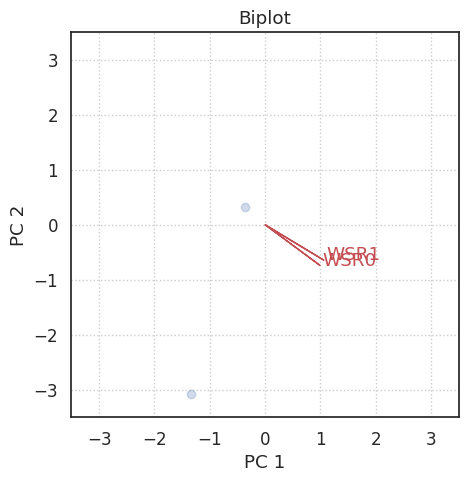

In [ ]:
# set eigenvectors to project data to
pc1, pc2 = 0, 1
eigenvector_x = pca.components_[pc1]
eigenvector_y = pca.components_[pc2]

# project data into PC space
xs = pca.transform(X)[:,pc1]
ys = pca.transform(X)[:,pc2]

# visualize projections
plt.figure(figsize=(5,5))

# arrows project features (ie columns from csv) as vectors onto PC axes
for i in range(2):
    plt.arrow(0, 0, eigenvector_x[i] * max(xs), eigenvector_y[i] * max(ys), color='r', width=0.0005)
    plt.text(eigenvector_x[i] * max(xs) + 0.05, eigenvector_y[i] * max(ys), X.columns[i], color='r')

# circles project documents (ie rows from csv) as points onto PC axes
for i in range(xs.shape[0]):
    plt.plot(xs[i], ys[i], 'bo', alpha=0.25)
    #plt.text(xs[i] - 0.05, ys[i] + 0.1, y[i], color='b', alpha=0.25)

plt.title("Biplot")
plt.xlabel("PC " + str(pc1 + 1))
plt.ylabel("PC " + str(pc2 + 1))
plt.xlim((-3.5, 3.5))
plt.ylim((-3.5, 3.5))
plt.grid(linestyle="dotted")
plt.show()

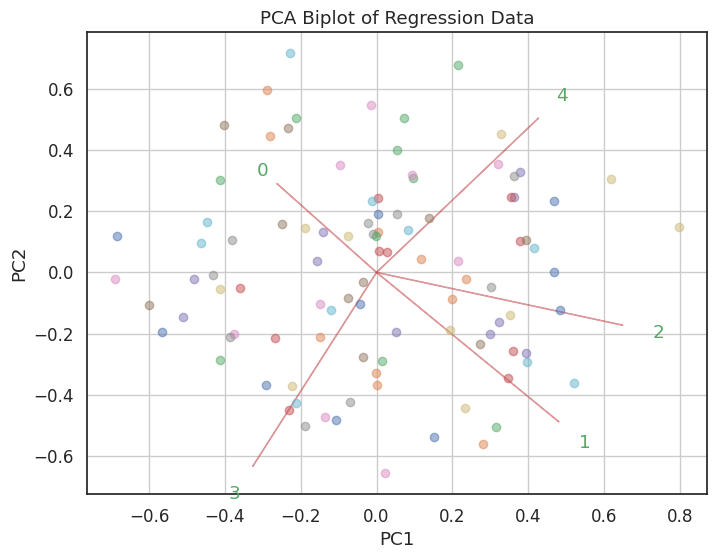

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate some regression data (X) and corresponding target values (y)
X = np.random.rand(100, 5)  # Example data with 5 features
y = np.random.rand(100)

# Perform PCA and extract the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a biplot
plt.figure(figsize=(8, 6))
for i in range(X.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, i, color='g', ha='center', va='center')

for i in range(X_pca.shape[0]):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot of Regression Data')
plt.grid()
plt.show()

### Task 2: PCA, classification (2 points)

Consider the classification problem of predicting the target variable `y` of eight vs one hour peak data subset. Apply a classifier of your choice on raw data and PCA-reduced data for specified explained variance level. Conclude whether applying PCA was able to improve the classification results.

Perform a feature selection, selecting top 5 performing features, with any technique you know, compare them with top 5 features influencing the first two principal components.

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data"
columns = ["V" + str(i) for i in range(1, 73)] + ["target"]
data = pd.read_csv(url, names=columns)

data.head()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...   V64    V65  \
1/1/1998  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  2.3  ...  0.15  10.67   
1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  3.4  ...  0.48   8.39   
1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  2.5  ...   0.6   6.94   
1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  3.1  ...  0.49   8.73   
1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  1.4  ...     ?      ?   

            V66   V67    V68   V69    V70  V71   V72 target  
1/1/1998  -1.56  5795  -12.1  17.9  10330  -55     0    0.0  
1/2/1998   3.84  5805  14.05    29  10275  -55     0    0.0  
1/3/1998    9.8  5790   17.9  41.3  10235  -40     0    0.0  
1/4/1998  10.54  5775  31.15  51.7  10195  -40  2.08    0.0  
1/5/1998      ?     ?      ?     ?      ?    ?  0.58    0.0  

[5 rows x 73 columns]

In [22]:
# remove missing values
data = data.apply(pd.to_numeric, errors='coerce').dropna()

X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Apply PCA for specified explained variance in interval (0.5, 0.95)
X_train_pca = []
X_test_pca = []

print(f"Original number of features: {X_train_scaled.shape[1]}")
for var in range(95, 45, -5):
    pca = PCA(n_components=var/100, random_state=42)
    X_train_pca.append(pca.fit_transform(X_train_scaled))
    X_test_pca.append(pca.transform(X_test_scaled))

    print(f"Reduced number of features after PCA with {var/100} explained variance: {X_train_pca[-1].shape[1]}")

Original number of features: 72
Reduced number of features after PCA with 0.95 explained variance: 19
Reduced number of features after PCA with 0.9 explained variance: 12
Reduced number of features after PCA with 0.85 explained variance: 8
Reduced number of features after PCA with 0.8 explained variance: 6
Reduced number of features after PCA with 0.75 explained variance: 4
Reduced number of features after PCA with 0.7 explained variance: 3
Reduced number of features after PCA with 0.65 explained variance: 3
Reduced number of features after PCA with 0.6 explained variance: 2
Reduced number of features after PCA with 0.55 explained variance: 2
Reduced number of features after PCA with 0.5 explained variance: 2


F1 score on raw data: 0.27999999999999997
Accuracy on raw data: 0.9351351351351351


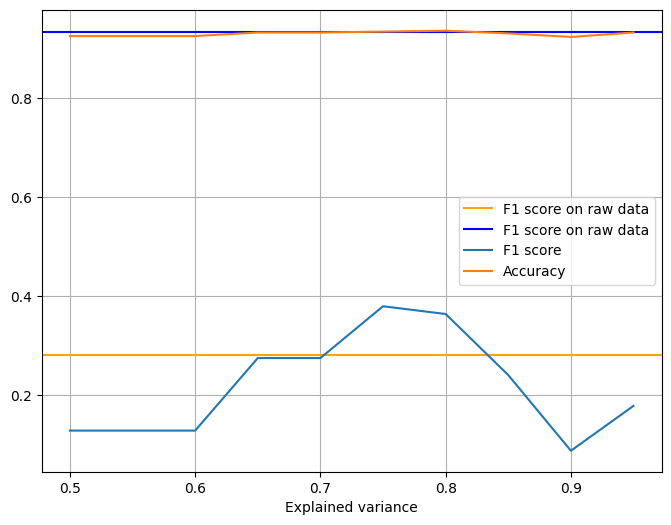

In [25]:
# Applying classifier
clf_raw = RandomForestClassifier(random_state=42)
clf_raw.fit(X_train_scaled, y_train)
y_pred_raw = clf_raw.predict(X_test_scaled)
f1_raw = f1_score(y_test, y_pred_raw)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# With PCA
f1_pca = []
accuracy_pca = []
print(f"F1 score on raw data: {f1_raw}")
print(f"Accuracy on raw data: {accuracy_raw}")
var = 100
for j in range(len(X_train_pca)):
    var = var - 5
    clf_pca = RandomForestClassifier(random_state=42)
    clf_pca.fit(X_train_pca[j], y_train)
    y_pred_pca = clf_pca.predict(X_test_pca[j])
    f1_pca.append(f1_score(y_test, y_pred_pca))
    accuracy_pca.append(accuracy_score(y_test, y_pred_pca))

var = [i/100 for i in range(50, 100, 5)]

plt.figure(figsize=(8, 6))
plt.axhline(y=f1_raw, color='orange', linestyle='-', label="F1 score on raw data")
plt.axhline(y=accuracy_raw, color='blue', linestyle='-', label="F1 score on raw data")
plt.plot(var, f1_pca[::-1], label="F1 score")
plt.plot(var, accuracy_pca[::-1], label="Accuracy")
plt.xlabel('Explained variance')
plt.legend()
plt.grid()
plt.show()

It seems that the data is quite noisy, and the classifier works better after PCA with a low explained variance (0.75 or 0.8)

In [27]:
# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=5)
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)
top_5_features = selector.get_support(indices=True)
print(f"Top 5 features selected by SelectKBest: {top_5_features}")

# Feature importance from RandomForest
importances = clf_raw.feature_importances_
indices = np.argsort(importances)[::-1]
top_5_importances = indices[:5]
print(f"Top 5 important features from RandomForest: {top_5_importances}")

# Top features influencing the first two principal components
pca_components = pca.components_[:2]
top_pca_features = np.argsort(np.abs(pca_components).sum(axis=0))[::-1][:5]
print(f"Top 5 features influencing the first two principal components: {top_pca_features}")

Top 5 features selected by SelectKBest: [39 40 41 42 43]
Top 5 important features from RandomForest: [67 12 40 41 58]
Top 5 features influencing the first two principal components: [25 24 30 29 31]


### Task 3: ICA, optimization (2 points)

Implement ICA solution with the (projected) gradient descent optimization scheme, using one of the following loss functions (see Lecture 3 slides):

- kurtosis, or
- negative entropy, or
- mutual information.

To which classes of the approaches to the solution of ICA problem those loss functions belong to?

Apply ICA using obtained optimization procedure to the mixture of $X_1 \sim Laplace(0,1)$ and $X_2 \sim U(0,1)$ used in Seminar 2.

In [28]:
import numpy as np
from scipy.special import expit

def kurtosis_loss(Y):
    return np.mean(Y**4, axis=1) - 3 * np.mean(Y**2, axis=1)**2

def neg_entropy_loss(Y, G, G_prime):
    return np.mean(G(Y), axis=1) - np.mean(G_prime(Y), axis=1)

def mutual_information_loss(Y):
    H_y = np.sum(np.log(np.cosh(Y)), axis=1)
    H_yi = np.sum(np.log(np.cosh(Y.T)), axis=0)
    return np.sum(H_y) - np.sum(H_yi)

def gradient_descent(W, X, loss_function, G=None, G_prime=None, alpha=0.01, max_iter=1000):
    for i in range(max_iter):
        Y = np.dot(W, X)
        if loss_function == 'kurtosis':
            loss = kurtosis_loss(Y)
        elif loss_function == 'neg_entropy':
            loss = neg_entropy_loss(Y, G, G_prime)
        elif loss_function == 'mutual_information':
            loss = mutual_information_loss(Y)
        else:
            raise ValueError("Unknown loss function")

        gradient = np.dot((Y * loss).T, X.T)
        W += alpha * gradient
        W = W / np.linalg.norm(W, axis=1, keepdims=True)
    return W

def G1(y):
    return y**4 / 4

def G1_prime(y):
    return y**3

def G2(y):
    return np.log(np.cosh(y))

def G2_prime(y):
    return np.tanh(y)

In [35]:
#From seminar 2
n = 1000

np.random.seed(42)
X_1 = np.random.uniform(-np.sqrt(3),np.sqrt(3), (n))
X_2 = np.random.laplace(0, 0.5, (n))
X = np.vstack([X_1, X_2])

In [37]:
W_init = np.random.randn(1000, 2)
W_kurtosis = gradient_descent(W_init.copy(), X, loss_function='kurtosis')
W_neg_entropy = gradient_descent(W_init.copy(), X, loss_function='neg_entropy', G=G2, G_prime=G2_prime)
W_mutual_information = gradient_descent(W_init.copy(), X, loss_function='mutual_information')

print("W_kurtosis:\n", W_kurtosis)
print("W_neg_entropy:\n", W_neg_entropy)
print("W_mutual_information:\n", W_mutual_information)

W_kurtosis:
 [[-0.66905206 -0.74321554]
 [-0.23779708 -0.97131486]
 [ 0.17276402  0.98496325]
 ...
 [ 0.6009183  -0.79931045]
 [ 0.75267984  0.65838671]
 [ 0.80500169 -0.59327251]]
W_neg_entropy:
 [[-0.99057058  0.13700336]
 [ 0.99984517  0.01759659]
 [ 0.99519603 -0.09790234]
 ...
 [-0.99602975  0.08902103]
 [ 0.99253207  0.12198398]
 [-0.98231531  0.18723417]]
W_mutual_information:
 [[-0.97973421  0.20030198]
 [ 0.99899423 -0.04483893]
 [ 0.95212961  0.30569464]
 ...
 [ 0.09987565 -0.99499993]
 [-0.72514094  0.68860048]
 [ 0.990216   -0.13954307]]


### Task 4: ICA, signal separation and reconstruction (2 points)

Consider the EEG dataset ``hw1/data/EEG.npy`` consisting of brain electrical activity of dimension $d=10001$ measured over time via $m=64$ electrodes. In EEG every single electrode captures activity not only in the direct vicitity, but in the neighboring areas as well, so we can of think of every electode signal as a linear mixture of local and neighboring activity, thus suiting the ICA model:

$$\mathbf{X} = \mathbf{A}\mathbf{S}$$

where $\mathbf{S} \in \mathbb{R}^{n \times d}$ - $n$ source signals of dimension $d$, $\mathbf{X} \in \mathbb{R}^{m \times d}$ - $m$ observations of dimension $d$, $\mathbf{A}$ - $m \times n$ mixing matrix, where $m \geq n, \mathrm{Rank}(\mathbf{A}) = n$.

Along with the normal brain activity, the signal may contain various artifacts, like eye blinks, seen as rapid and high amplitude noise corrupting the signal.

The task is to separate the signal from noise, given by ICA components having blinks. Find $n=40$ sources using `FastICA` from sklearn. Handpick the sources contaning blinks and remove them while reconstucting the the signals back from sources, not having the blinks. You can additionally preprocess the data with `PCA` reducing the number of signals to $m_{PCA}=48$.

**Note:** the key for the reconstruction is the mixing matrix $\mathbf{A}$, it can be found via ``ica.mixing_``.

In [17]:
X = np.load("/content/EEG.npy")

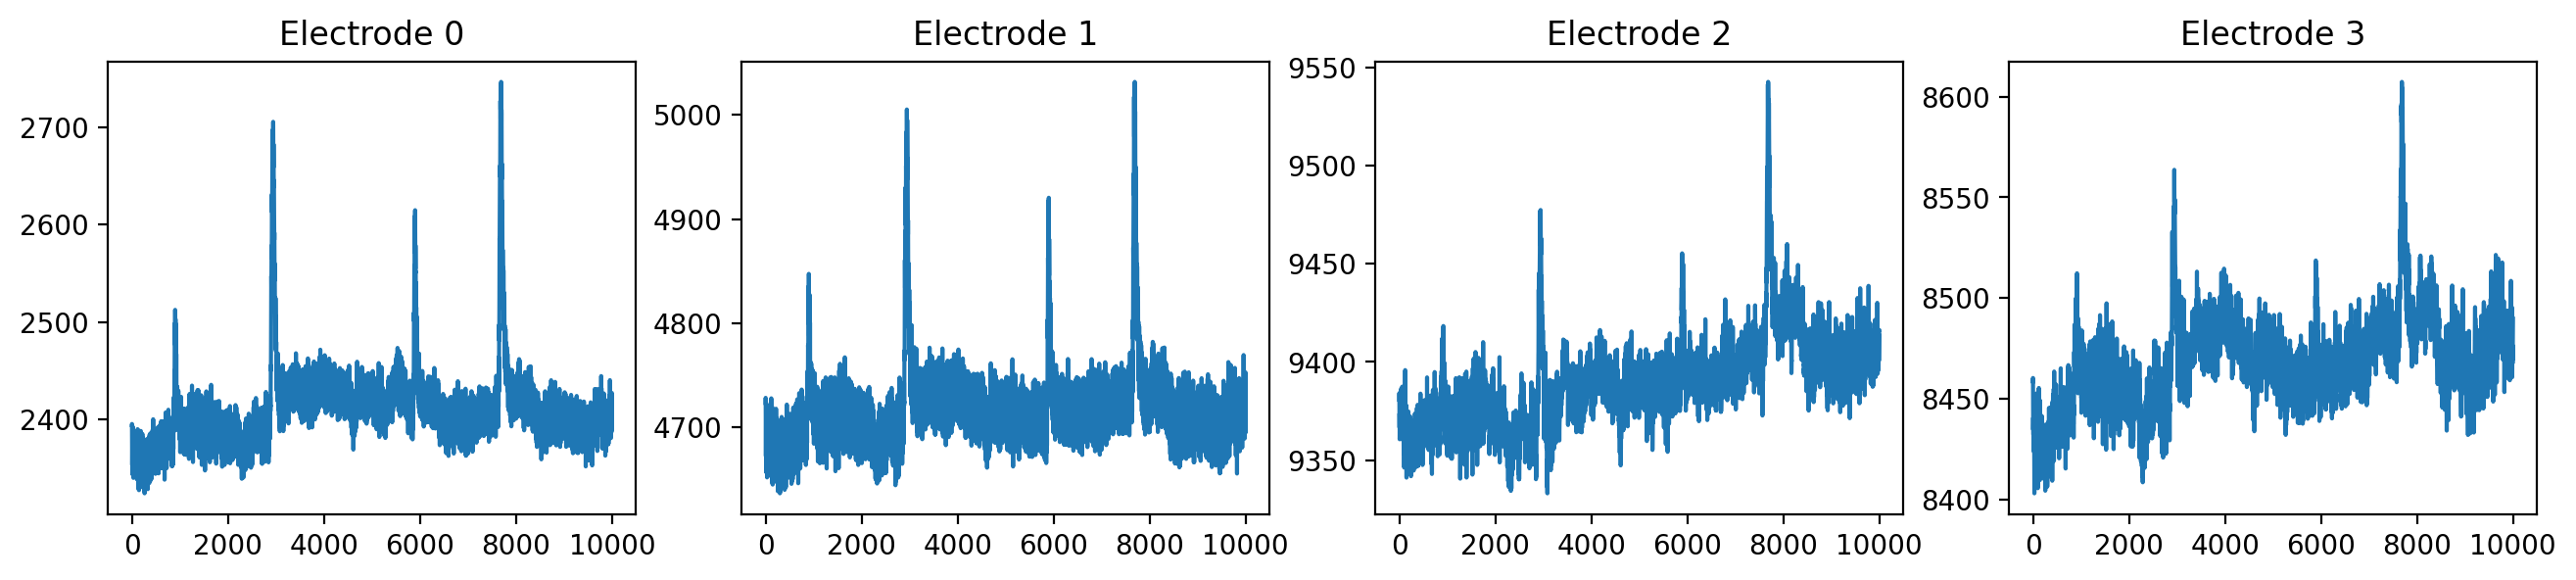

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3), dpi=200)
for j in range(4):
    ax[j].set_title("Electrode {}".format(j))
    ax[j].plot(X[:,j])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


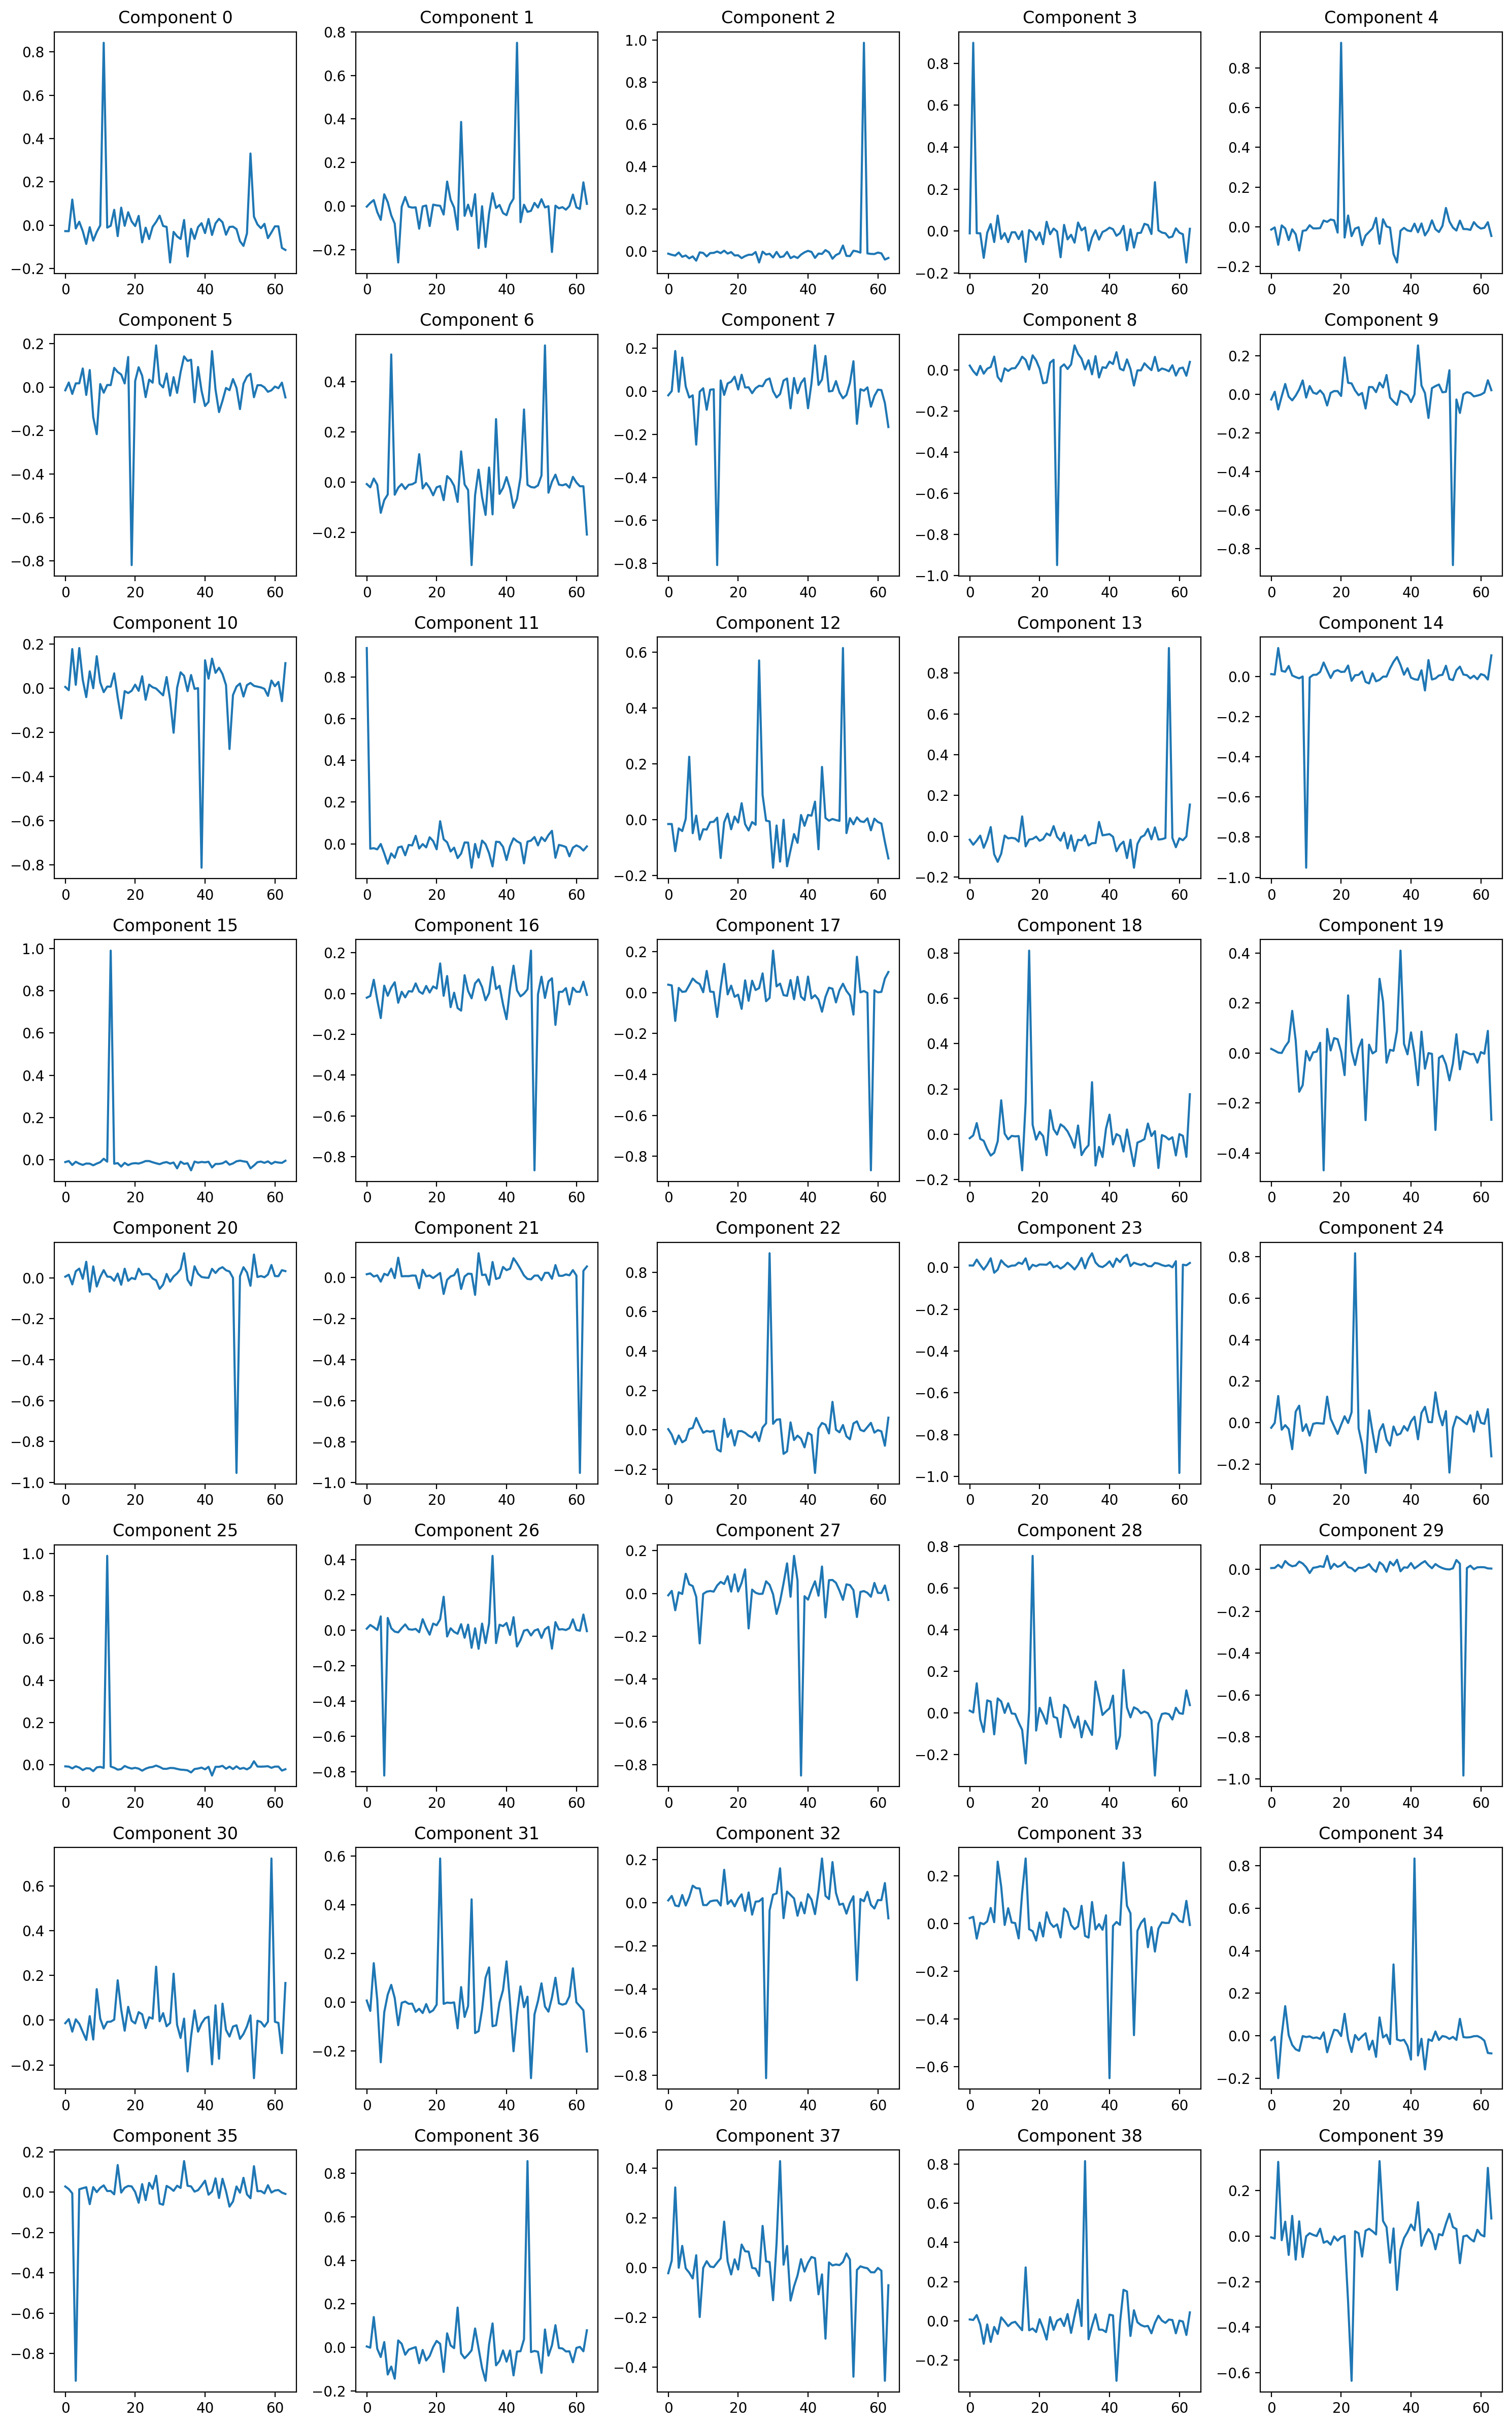

In [30]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=40, random_state=42)
sources = ica.fit_transform(X.T).T  # Transpose to match sklearn's requirements

fig, ax = plt.subplots(8, 5, figsize=(15, 24), dpi=200)

for j in range(5 * 8):
    row = j // 5
    col = j % 5
    ax[row, col].set_title(f"Component {j}")
    ax[row, col].plot(sources[j, :])

plt.tight_layout()
plt.show()

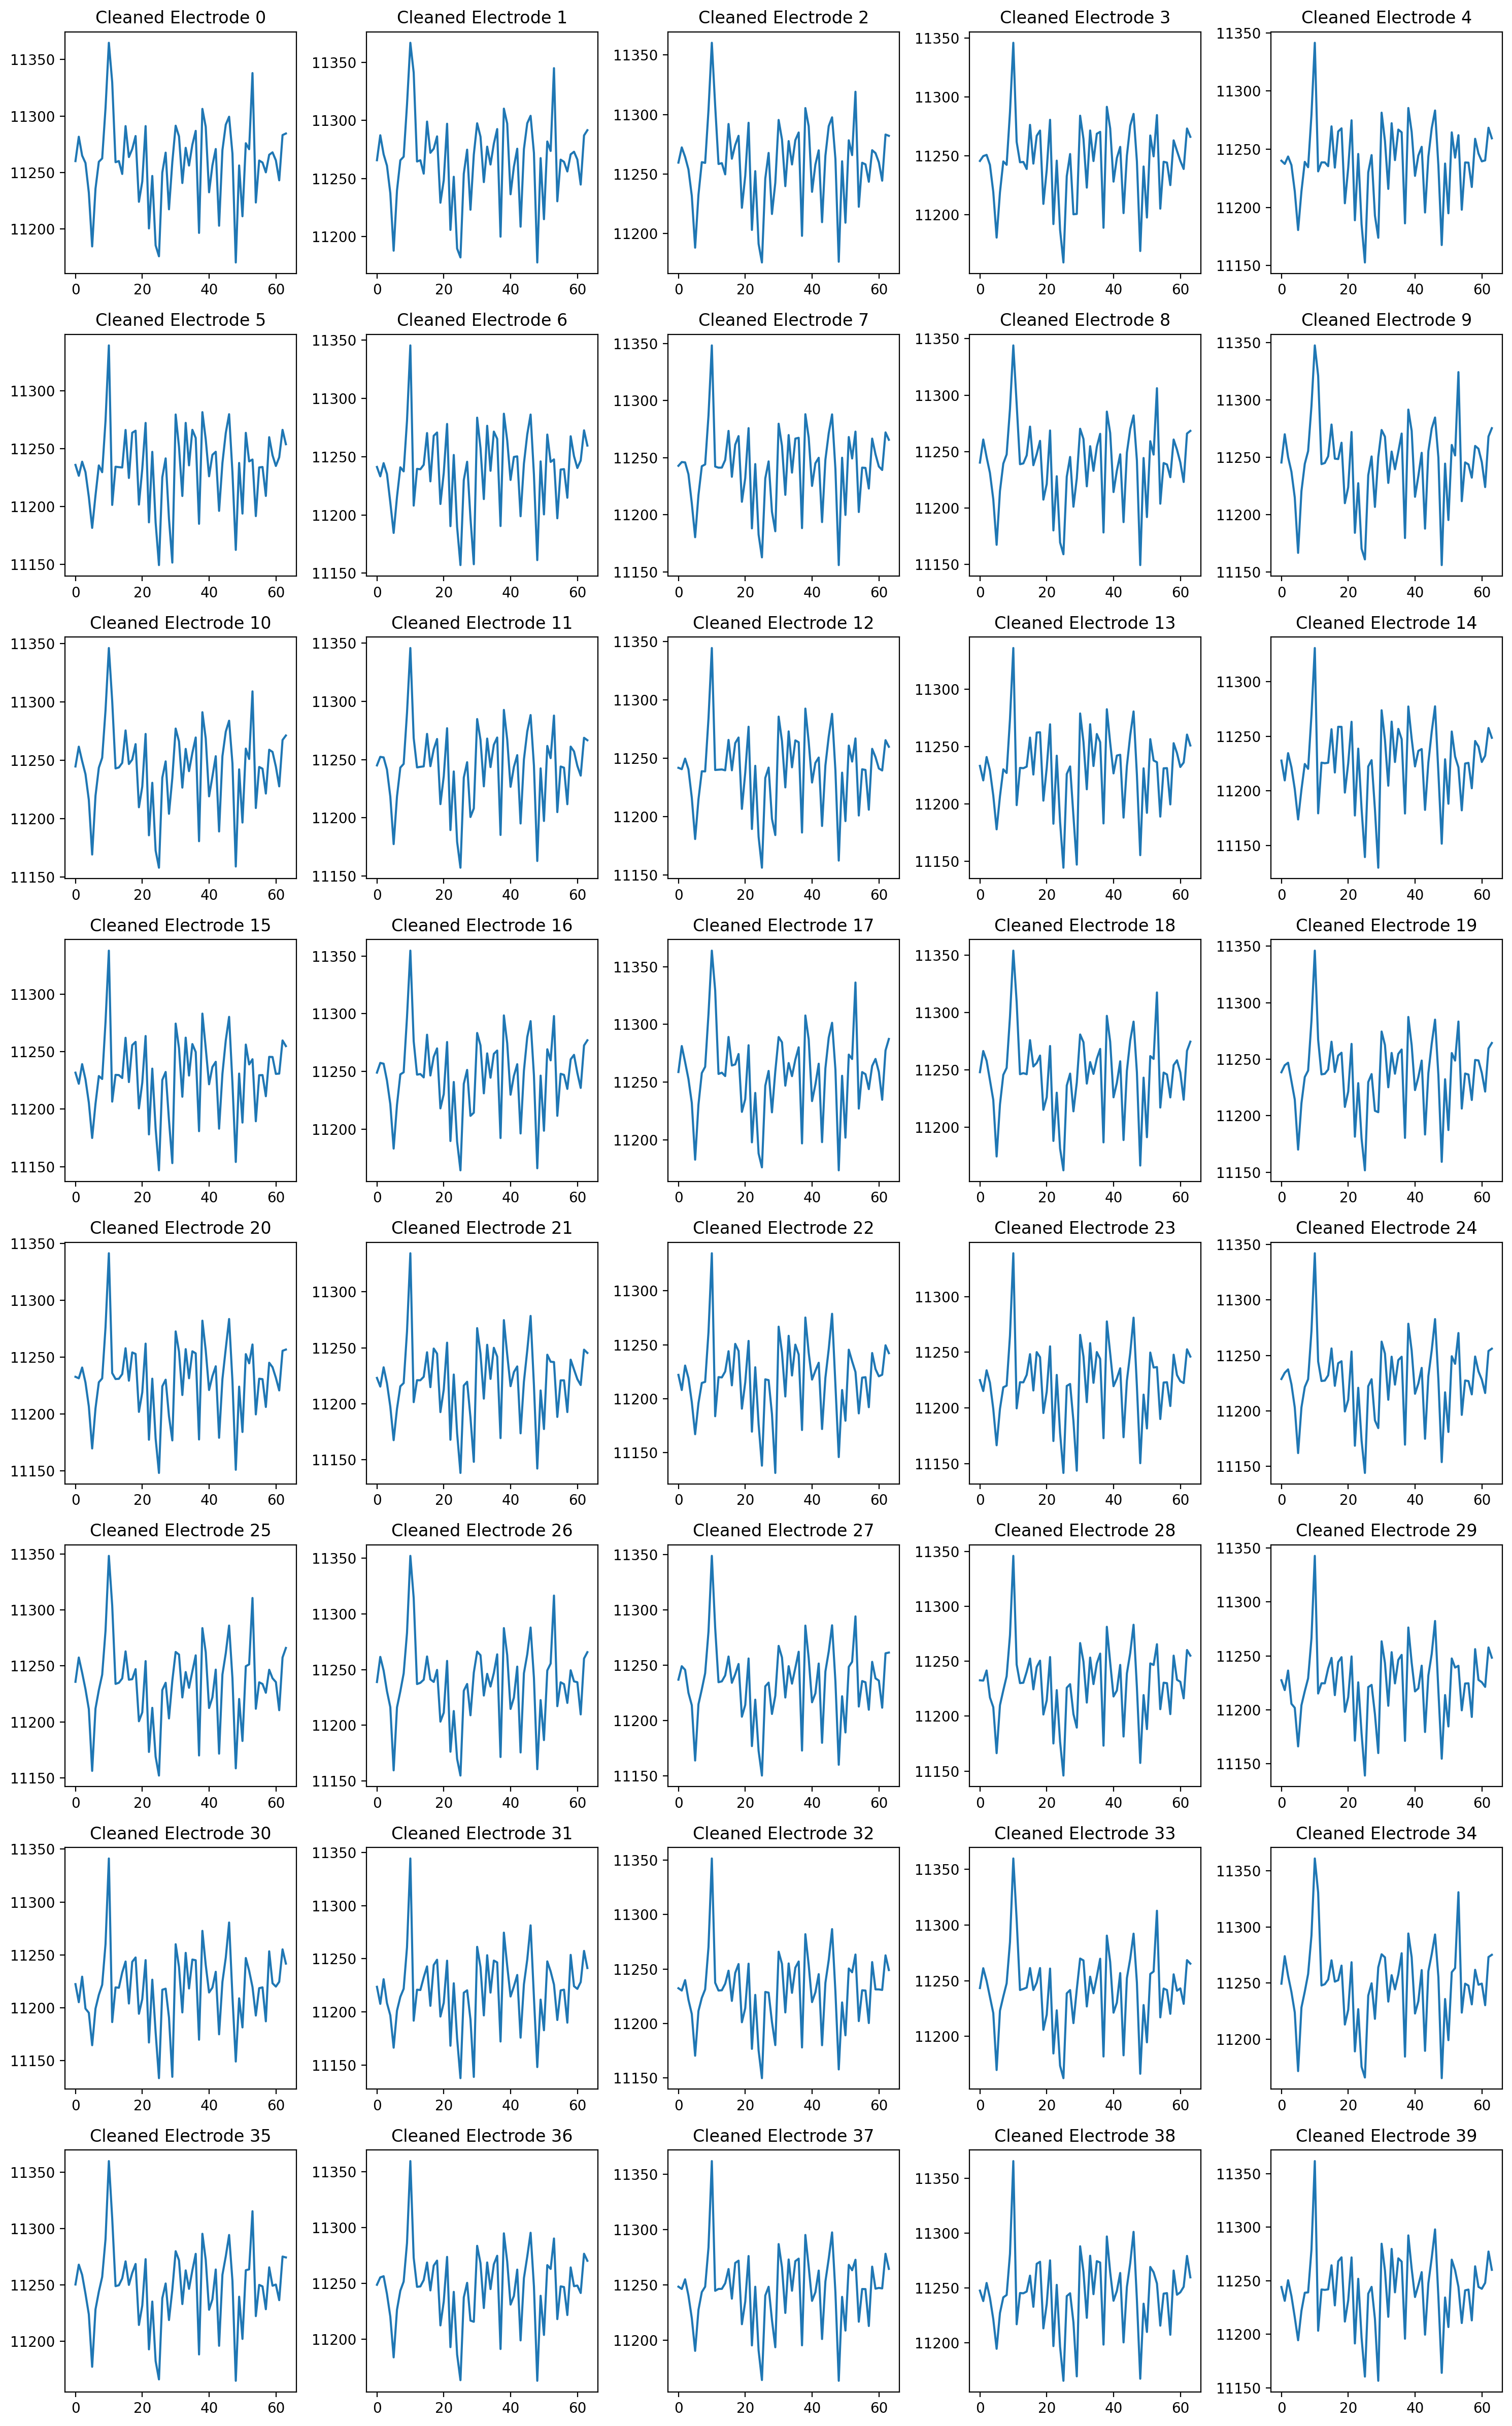

In [31]:
artifact_components = [2, 11, 15, 23, 25, 29]

# Zero out the artifact components
clean_sources = np.copy(sources)
clean_sources[artifact_components, :] = 0

# Reconstruct the cleaned signals
cleaned_signals = ica.inverse_transform(clean_sources.T).T

fig, ax = plt.subplots(8, 5, figsize=(15, 24), dpi=200)

for j in range(5 * 8):
    row = j // 5
    col = j % 5
    ax[row, col].set_title(f"Cleaned Electrode {j}")
    ax[row, col].plot(cleaned_signals[j, :])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


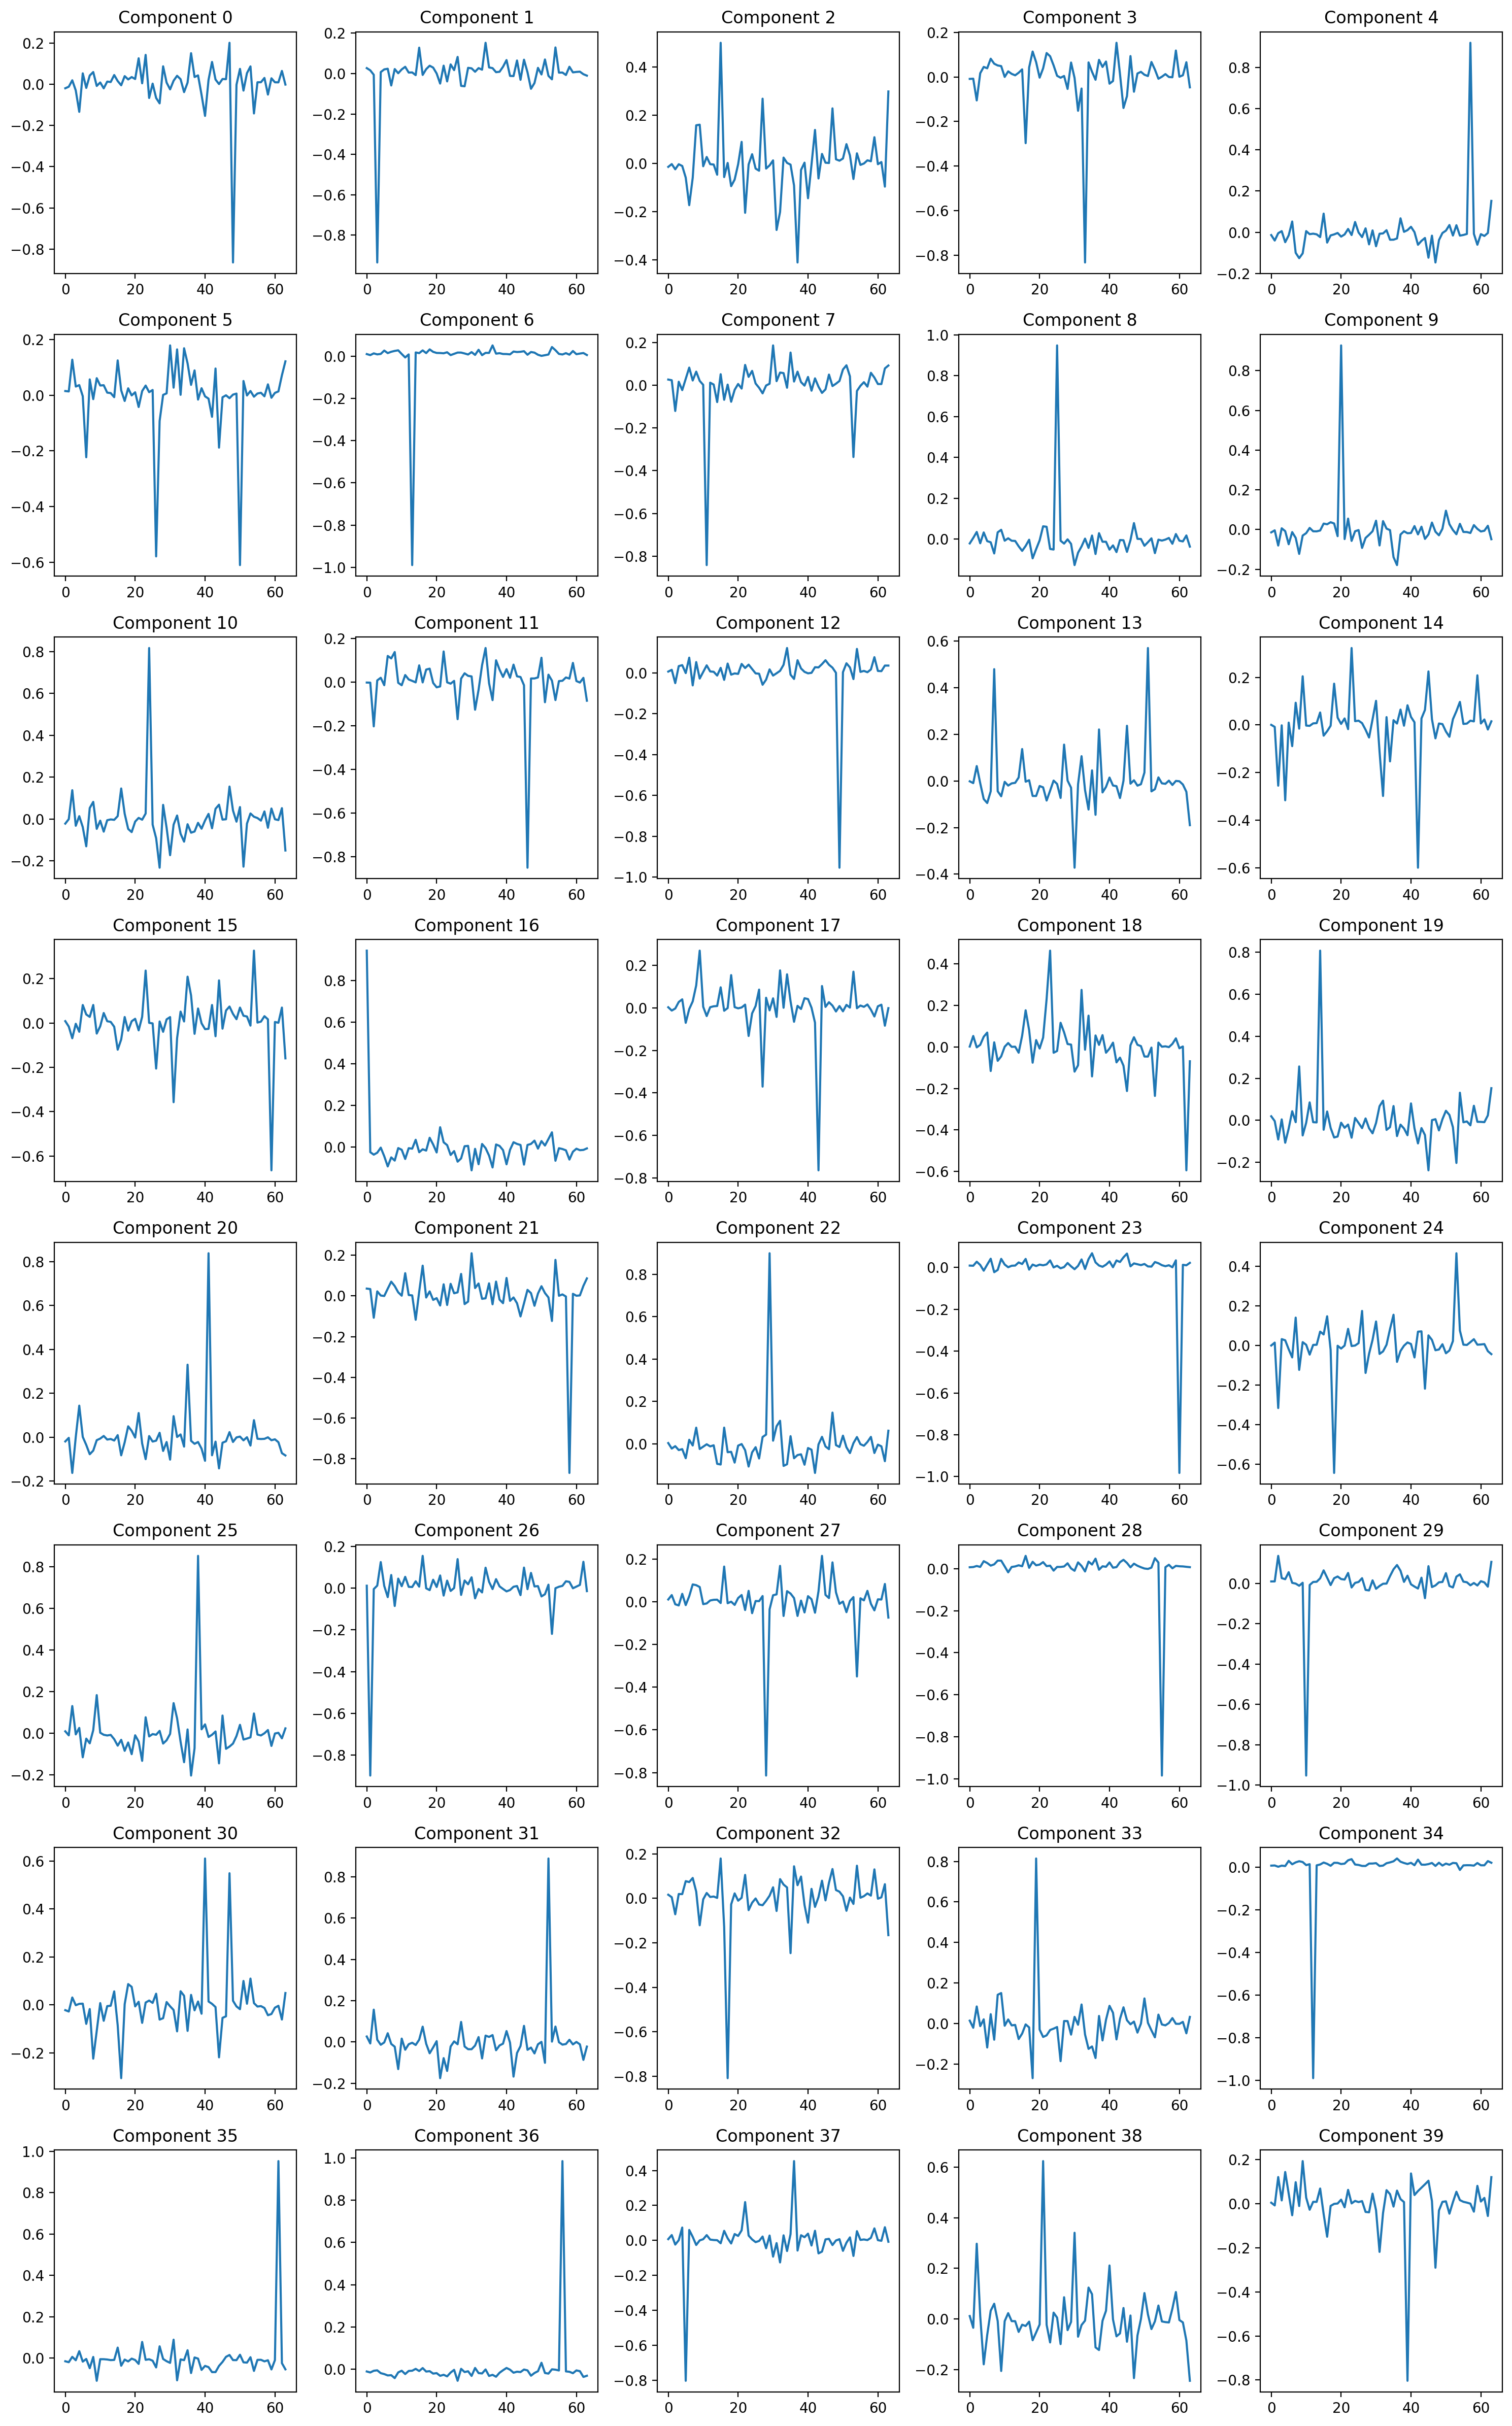

In [32]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=48, random_state=42)
reduced_data = pca.fit_transform(X.T).T

ica_reduced = FastICA(n_components=40, random_state=42)
sources_reduced = ica_reduced.fit_transform(reduced_data.T).T

fig, ax = plt.subplots(8, 5, figsize=(15, 24), dpi=200)

for j in range(5 * 8):
    row = j // 5
    col = j % 5
    ax[row, col].set_title(f"Component {j}")
    ax[row, col].plot(sources_reduced[j, :])

plt.tight_layout()
plt.show()

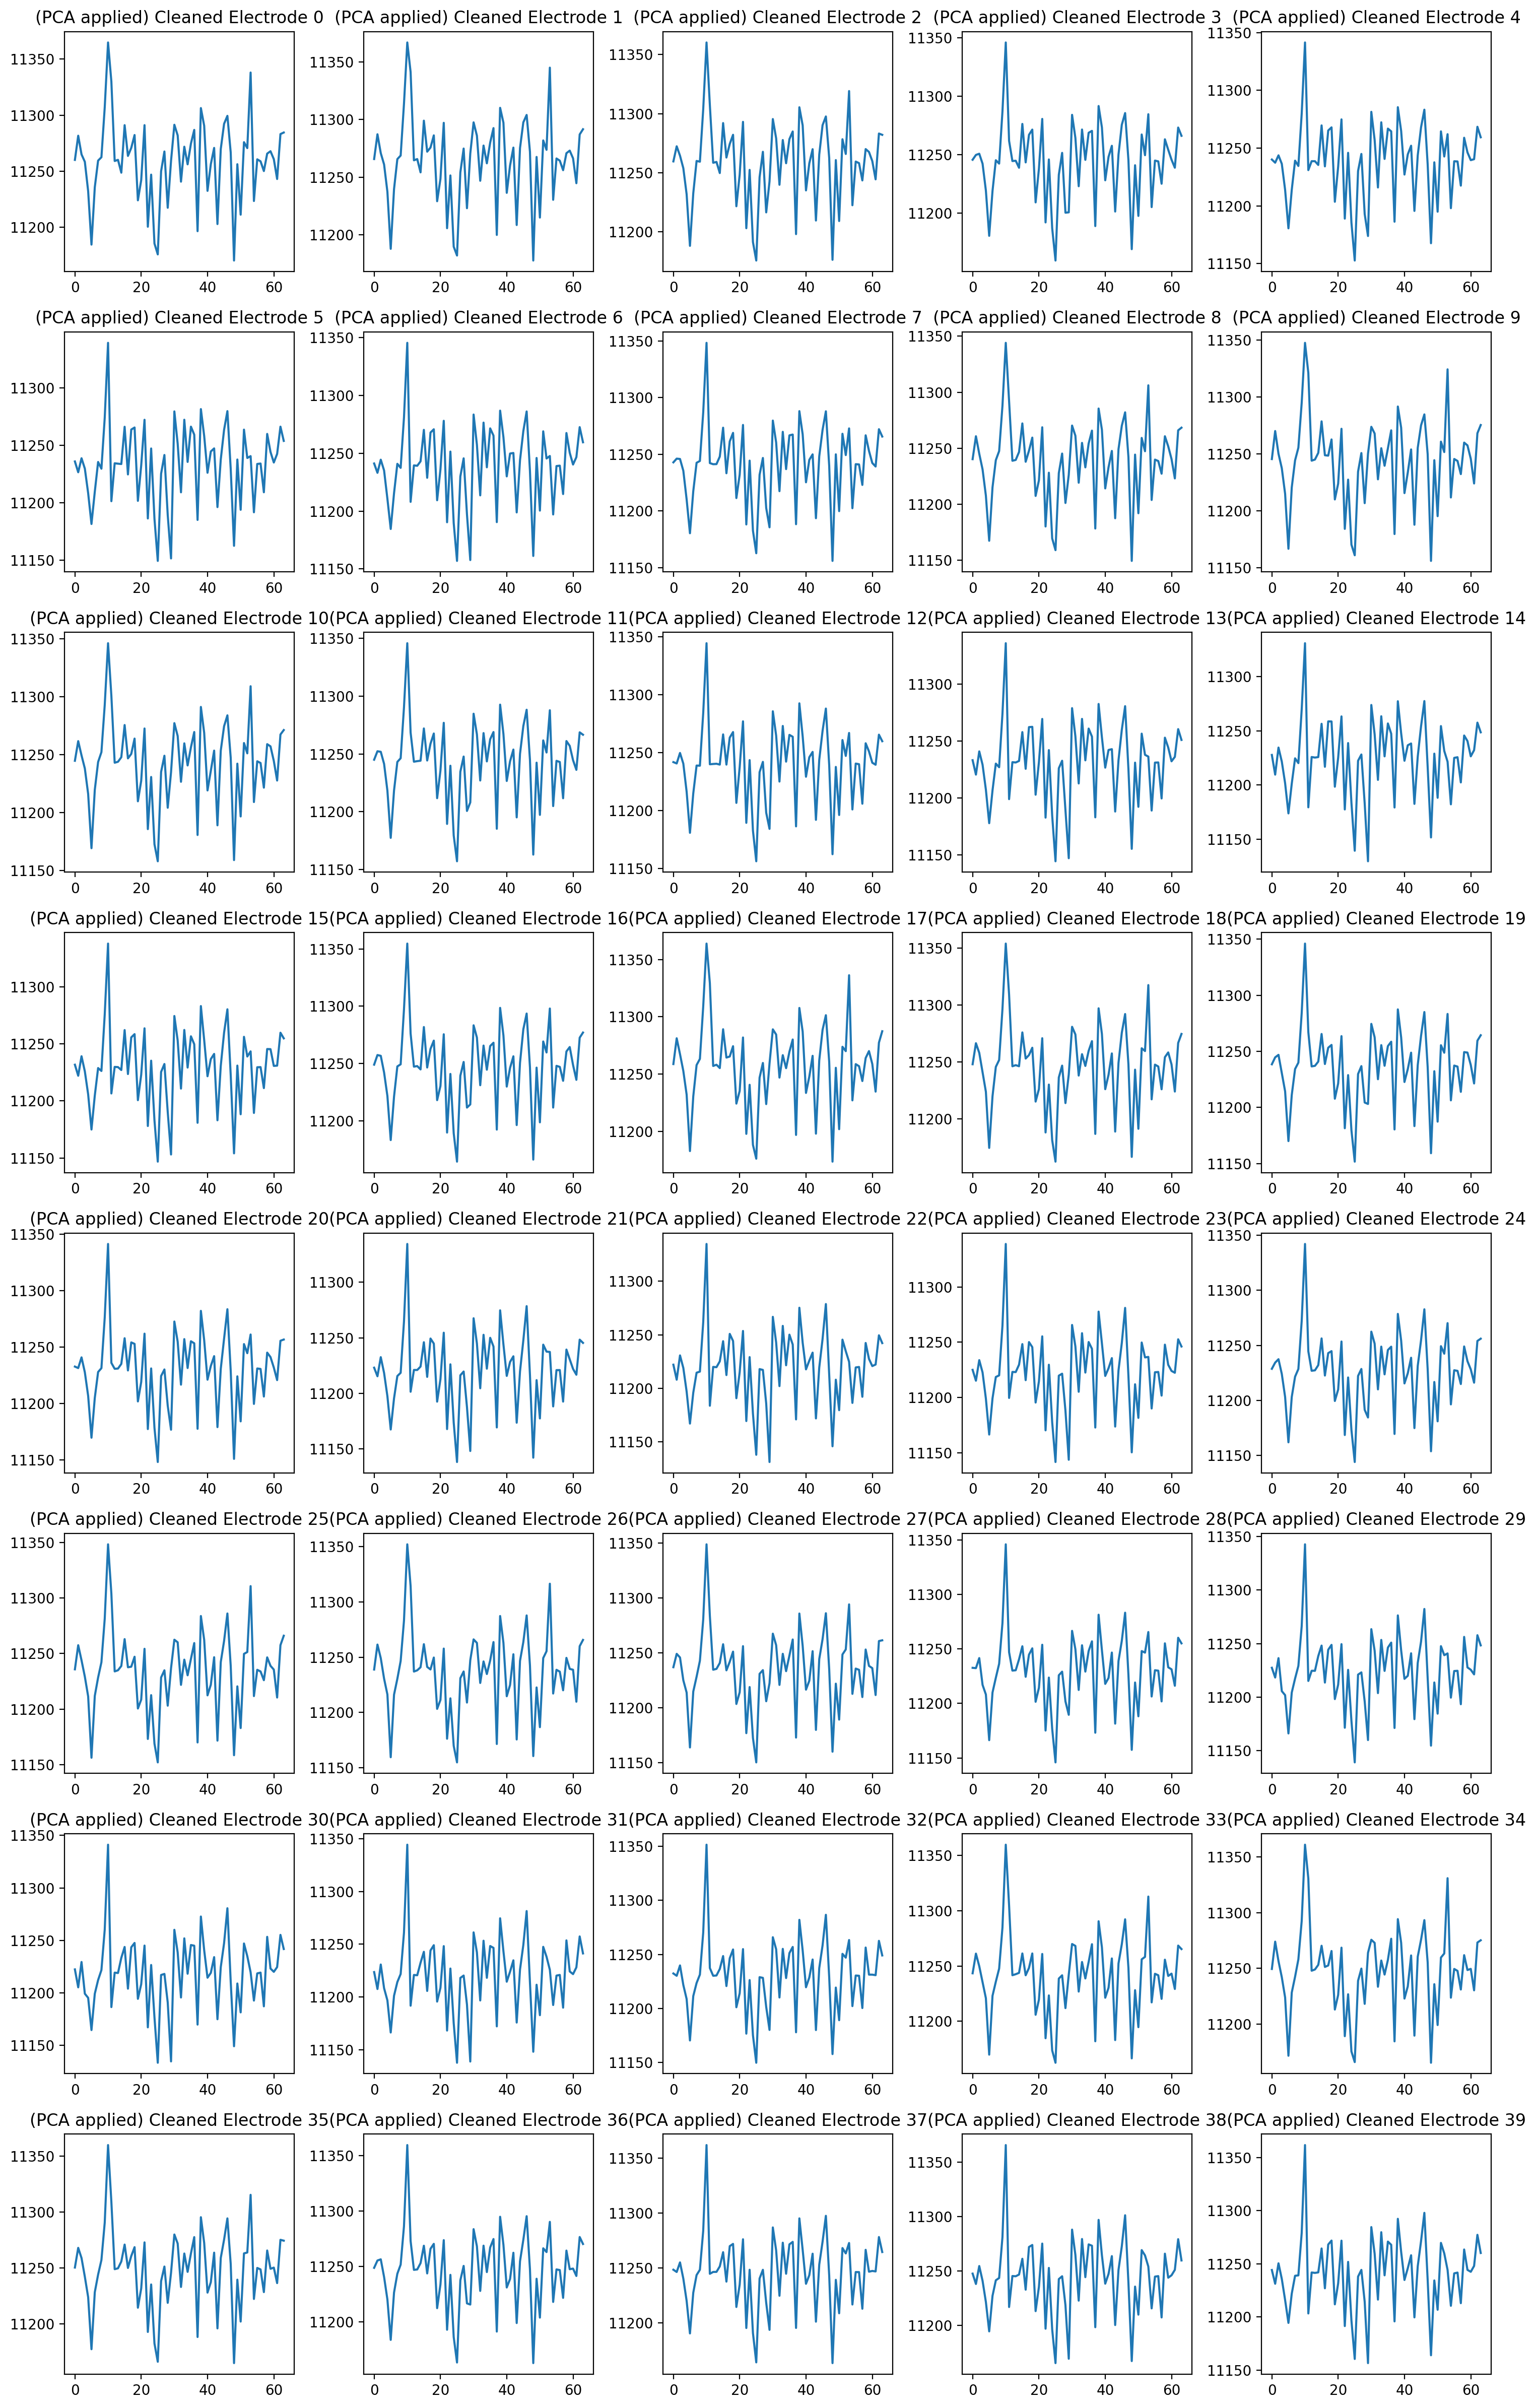

In [34]:
artifact_components_reduced = [6, 23, 28, 34, 36]
clean_sources_reduced = np.copy(sources_reduced)
clean_sources_reduced[artifact_components_reduced, :] = 0

cleaned_signals_reduced = ica_reduced.inverse_transform(clean_sources_reduced.T).T

fig, ax = plt.subplots(8, 5, figsize=(15, 24), dpi=200)

for j in range(5 * 8):
    row = j // 5
    col = j % 5
    ax[row, col].set_title(f"(PCA applied) Cleaned Electrode {j}")
    ax[row, col].plot(cleaned_signals[j, :])

plt.tight_layout()
plt.show()

#### Grading:

- 8/10 points are awarded for completing all the tasks and giving proper answers to questions.
- 2/10 points are awarded for the quality of reporting, be sure to give explanations and comments to your solutions.
- +1 extra point may be awarded for the extra work performed, be creative.